In [36]:
pip install pyecharts

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import pandas as pd

In [37]:
from pyecharts.charts import Sankey
from pyecharts import options as options

In [3]:
data = pd.read_csv("./data_cleaned.csv", index_col='mathematicians')

In [4]:
data.columns

Index(['occupation', 'country of citizenship', 'place of birth',
       'date of death', 'educated at', 'employer', 'place of death',
       'member of', 'employer.1', 'doctoral advisor',
       'languages spoken, written or signed', 'academic degree',
       'doctoral student', 'manner of death', 'position held', 'field of work',
       'award received', 'Erdős number', 'instance of', 'sex or gender',
       'approx. date of birth', 'day of birth', 'month of birth',
       'year of birth', 'approx. date of death', 'day of death',
       'month of death', 'year of death'],
      dtype='object')

In [5]:
country_data =data[['country of citizenship','educated at','employer']].dropna()
country_data['count']=1 

In [6]:
for mathematicians in country_data.index:
    country_data.at[mathematicians,'country of citizenship'] = eval(country_data.at[mathematicians,'country of citizenship'])
    country_data.at[mathematicians,'educated at'] = eval(country_data.at[mathematicians,'educated at'])
    country_data.at[mathematicians,'employer'] = eval(country_data.at[mathematicians,'employer'])

In [7]:
country_data = country_data.explode('country of citizenship')
country_data = country_data.explode('employer')
country_data = country_data.explode('educated at')

In [8]:
country_data

,country of citizenship,educated at,employer,count
mathematicians,,,,
Roger Joseph Boscovich,Republic of Ragusa,Pontifical Gregorian University,Pontifical Gregorian University,1
Emma Previato,United States of America,Harvard University,Boston University,1
Emma Previato,United States of America,University of Padua,Boston University,1
Emma Previato,United States of America,Harvard University,University of Padua,1
Emma Previato,United States of America,University of Padua,University of Padua,1
...,...,...,...,...
Arnaud Beauville,France,Paris Diderot University,École Normale Supérieure,1
Arnaud Beauville,France,Paris Diderot University,University of Nice Sophia Antipolis,1
Ralph Henstock,United Kingdom,St John's College,University of Bristol,1


In [9]:
for i in range(len(country_data.index)):
    if country_data.iloc[i,0][0].isdigit() == True:
        country_data.iloc[i,0]=np.nan
    if country_data.iloc[i,1][0].isdigit() == True:
        country_data.iloc[i,1]=np.nan
    if country_data.iloc[i,2][0].isdigit() == True:
        country_data.iloc[i,2]=np.nan

country_data = country_data.dropna()

①桑葚图

In [10]:
#每列保留节点15，其他是other
#冲突节点改名

def sankey_data_preprocessing(sankey_data_2, reserved_num):
    
    other_cols_dict = {}
    pred_cols = set()
    alter_col_dict = {}
    
    #每列保留的节点,其他变为others
    for col in sankey_data_2.columns:
        other_cols_dict[col] = list(sankey_data_2[col].value_counts().index[reserved_num:])
    for col in sankey_data_2.columns:
        sankey_data_2[col] = sankey_data_2[col].map(lambda x : 'others' if x in other_cols_dict[col] else x)
        
    #冲突节点，改名
    i = 0
    for col in sankey_data_2.columns: 
        alter_col_dict[col]={}
        for pc in set(sankey_data_2[col]):
            if pc in pred_cols:
                alter_col_dict[col][pc] = pc+ '{}'.format(i)
        i+=1
        [pred_cols.add(pc) for pc in set(sankey_data_2[col])]
        
    for col in sankey_data_2.columns:
        if col in alter_col_dict.keys():
            sankey_data_2[col] = sankey_data_2[col].map(lambda x : alter_col_dict[col][x] if x in alter_col_dict[col].keys() else x)
            
    return sankey_data_2

In [11]:
sankey_data = pd.DataFrame()
sankey_data = pd.concat([country_data,sankey_data])
sankey_data = sankey_data_preprocessing(sankey_data, 15)

In [12]:
edge_data1 = sankey_data[['country of citizenship','educated at','count']].groupby(['country of citizenship','educated at']).count()
edge_data2 = sankey_data[['educated at','employer','count']].groupby(['educated at','employer']).count()

edge_data1 = edge_data1.reset_index()
edge_data2 = edge_data2.reset_index()

edge_data1.columns = ['source','target','value']
edge_data2.columns = ['source','target','value']

edge_data = pd.concat([edge_data1,edge_data2])

links = edge_data.to_dict('records')

In [13]:
links

[{'source': 'Australia', 'target': 'Doctor of Philosophy', 'value': 6},
 {'source': 'Australia', 'target': 'Harvard University', 'value': 3},
 {'source': 'Australia', 'target': 'Princeton University', 'value': 3},
 {'source': 'Australia', 'target': 'Trinity College', 'value': 2},
 {'source': 'Australia',
  'target': 'University of California, Berkeley',
  'value': 2},
 {'source': 'Australia', 'target': 'University of Göttingen', 'value': 1},
 {'source': 'Australia', 'target': 'others1', 'value': 69},
 {'source': 'Austria', 'target': 'University of Göttingen', 'value': 14},
 {'source': 'Austria', 'target': 'University of Paris', 'value': 5},
 {'source': 'Austria', 'target': 'University of Vienna', 'value': 56},
 {'source': 'Austria', 'target': 'others1', 'value': 35},
 {'source': 'Canada', 'target': 'Doctor of Philosophy', 'value': 9},
 {'source': 'Canada', 'target': 'Harvard University', 'value': 11},
 {'source': 'Canada',
  'target': 'Massachusetts Institute of Technology',
  'value':

In [14]:
nodes1 = set(edge_data['source'])
nodes2 = set(edge_data['target'])
nodes3 = list(nodes1|nodes2)

nodes4 = pd.DataFrame(nodes3,columns=['name'])

nodes = nodes4.to_dict('records')

In [32]:
nodes

[{'name': 'Russian Empire'},
 {'name': 'Germany'},
 {'name': 'Massachusetts Institute of Technology'},
 {'name': 'India'},
 {'name': 'Cornell University'},
 {'name': 'Canada'},
 {'name': 'Yale University'},
 {'name': 'Saint Petersburg State University'},
 {'name': 'France'},
 {'name': 'Moscow State University2'},
 {'name': 'others1'},
 {'name': 'Sweden'},
 {'name': 'Kingdom of the Netherlands'},
 {'name': 'University of Paris2'},
 {'name': 'Moscow State University'},
 {'name': 'Poland'},
 {'name': 'Massachusetts Institute of Technology2'},
 {'name': 'University of Chicago'},
 {'name': 'Columbia University'},
 {'name': 'University of California, Berkeley2'},
 {'name': 'University of Göttingen'},
 {'name': 'University of Wisconsin–Madison'},
 {'name': 'United Kingdom'},
 {'name': 'Australia'},
 {'name': 'University of Chicago2'},
 {'name': 'New York University'},
 {'name': 'University of California, Los Angeles'},
 {'name': 'professor'},
 {'name': 'Trinity College'},
 {'name': 'Austria'}

In [39]:
c = (
    Sankey()
    .add(
        "sankey",
        nodes,
        links,
        pos_top="10%",
        #focus_node_adjacency=True,
        levels=[
            options.SankeyLevelsOpts(
                depth=0,
                itemstyle_opts=options.ItemStyleOpts(color="#fbb4ae"),
                linestyle_opts=options.LineStyleOpts(color="source", opacity=0.6),
            ),
            options.SankeyLevelsOpts(
                depth=1,
                itemstyle_opts=options.ItemStyleOpts(color="#b3cde3"),
                linestyle_opts=options.LineStyleOpts(color="source", opacity=0.6),
            ),
            options.SankeyLevelsOpts(
                depth=2,
                itemstyle_opts=options.ItemStyleOpts(color="#ccebc5"),
                linestyle_opts=options.LineStyleOpts(color="source", opacity=0.6),
            )
        ],
        linestyle_opt=options.LineStyleOpts(curve=0.5),
        label_opts=options.LabelOpts(position='right'),
    )
    .set_global_opts(
        title_opts=options.TitleOpts(title="数学家地理上流动-桑葚图"),
        tooltip_opts=options.TooltipOpts(trigger="item", trigger_on="mousemove"),
    )
    .render("数学家地理上流动桑葚图.html")
)

In [1]:
import holoviews as hv
from holoviews import dim, opts

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
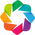

In [2]:
hv.extension('bokeh')
hv.output(size=200)

In [3]:
#每列保留节点15，其他是other

def sankey_data_preprocessing_2(sankey_data_2, reserved_num):
    other_cols_dict = {}
    
    #每列保留的节点,其他变为others
    for col in sankey_data_2.columns:
        other_cols_dict[col] = list(sankey_data_2[col].value_counts().index[reserved_num:])
    for col in sankey_data_2.columns:
        sankey_data_2[col] = sankey_data_2[col].map(lambda x : 'others' if x in other_cols_dict[col] else x)
        
    return sankey_data_2

In [7]:
sankey_data_2 = pd.DataFrame()
sankey_data_2 = pd.concat([country_data, sankey_data_2])
sankey_data_2 = sankey_data_preprocessing_2(sankey_data_2,15)

NameError: name 'country_data' is not defined

In [14]:
sankey_data_2

,country of citizenship,educated at,employer,count
mathematicians,,,,
Roger Joseph Boscovich,others,others,others,1
Emma Previato,United States of America,Harvard University,others,1
Emma Previato,United States of America,others,others,1
Emma Previato,United States of America,Harvard University,others,1
Emma Previato,United States of America,others,others,1
...,...,...,...,...
Arnaud Beauville,France,others,others,1
Arnaud Beauville,France,others,others,1
Ralph Henstock,United Kingdom,others,others,1


In [15]:
nodes_2 = pd.DataFrame(pd.concat([sankey_data_2['educated at'],sankey_data_2['employer']]).unique(),columns=['index'])
nodes_2 = hv.Dataset(nodes_2, 'index')

In [16]:
edge_data3 = sankey_data_2[['educated at','employer','count']].groupby(['educated at','employer']).count()
edge_data3 = edge_data3.reset_index()
edge_data3.columns = ['source','target','value']

In [17]:
chord = hv.Chord((edge_data3, nodes_2))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='index', node_color=dim('index').str())
)

:Chord   [source,target]   (value)